In [18]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import moviepy.editor

In [2]:
os.chdir('..')

In [3]:
os.getcwd()

'/home/admin-gpu/Downloads/action_recognition/action_recognition'

In [4]:
dataset_path = "data.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df

name_video          label
0     videos/video_0000.mp4    tap dancing
1     videos/video_0001.mp4    tap dancing
2     videos/video_0002.mp4    tap dancing
3     videos/video_0003.mp4    tap dancing
4     videos/video_0004.mp4    tap dancing
...                     ...            ...
2367  videos/video_2367.mp4  tango dancing
2368  videos/video_2368.mp4  tango dancing
2369  videos/video_2369.mp4  tango dancing
2370  videos/video_2370.mp4  tango dancing
2371  videos/video_2371.mp4  tango dancing

[2372 rows x 2 columns]

In [6]:
class_labels = df["label"].unique().tolist()
class_labels

['tap dancing',
 'breakdancing',
 'belly dancing',
 'dancing charleston',
 'dancing ballet',
 'square dancing',
 'jumpstyle dancing',
 'salsa dancing',
 'robot dancing',
 'country line dancing',
 'dancing macarena',
 'mosh pit dancing',
 'dancing gangnam style',
 'swing dancing',
 'tango dancing']

/tmp/ipykernel_3605197/142601126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
/tmp/ipykernel_3605197/142601126.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_labels)


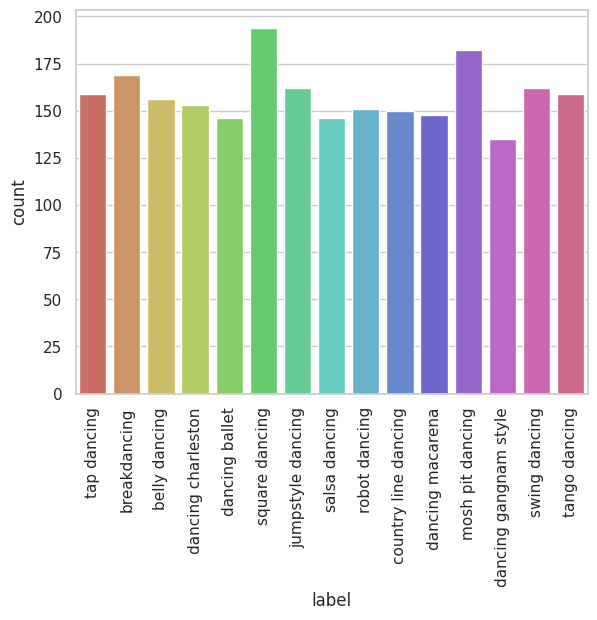

In [7]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

In [19]:
def get_video_duration(path_to_video):
    # create video capture object 
    data = cv2.VideoCapture(path_to_video) 
    
    # count the number of frames 
    frames = data.get(cv2.CAP_PROP_FRAME_COUNT) 
    fps = data.get(cv2.CAP_PROP_FPS) 
    
    # calculate duration of the video 
    duration = frames / fps
    
    return duration

def get_video_duration_moviepy(path_to_video):
    video = moviepy.editor.VideoFileClip(path_to_video)
    duration = int(video.duration)
    
    return duration

In [9]:
get_video_duration(df["name_video"][0])

10.377033333333333

In [10]:
df["duration"] = df["name_video"].apply(get_video_duration)

In [11]:
df["duration"].describe()

count    2372.000000
mean       12.060369
std         1.836172
min         1.233333
25%        10.700000
50%        12.000000
75%        13.462959
max        16.983633
Name: duration, dtype: float64

In [12]:
df[df['duration'] > 16]

name_video                  label   duration
1153  videos/video_1153.mp4          salsa dancing  16.950267
1467  videos/video_1467.mp4   country line dancing  16.440000
1809  videos/video_1809.mp4       mosh pit dancing  16.163909
1869  videos/video_1869.mp4       mosh pit dancing  16.116100
1969  videos/video_1969.mp4  dancing gangnam style  16.983633
1976  videos/video_1976.mp4  dancing gangnam style  16.733333
2143  videos/video_2143.mp4          swing dancing  16.249567

<Axes: ylabel='Density'>

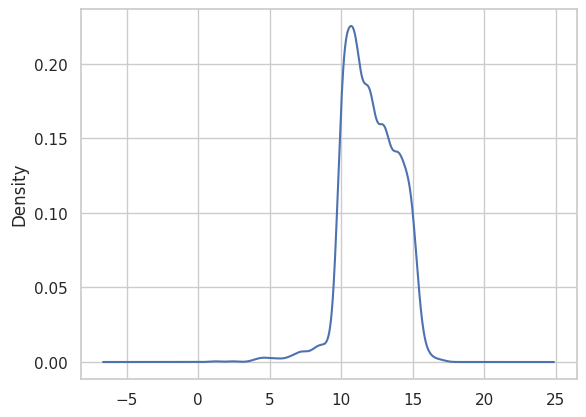

In [13]:
df["duration"].plot(kind="kde")

In [20]:
df["duration_2"] = df["name_video"].apply(get_video_duration_moviepy)

In [23]:
df["duration_2"].describe()

count    2372.000000
mean       11.682968
std         1.828542
min         1.000000
25%        10.000000
50%        12.000000
75%        13.000000
max        16.000000
Name: duration_2, dtype: float64

In [25]:
df[df['duration_2'] >= 16]

name_video                  label   duration  duration_2
1153  videos/video_1153.mp4          salsa dancing  16.950267          16
1467  videos/video_1467.mp4   country line dancing  16.440000          16
1809  videos/video_1809.mp4       mosh pit dancing  16.163909          16
1869  videos/video_1869.mp4       mosh pit dancing  16.116100          16
1969  videos/video_1969.mp4  dancing gangnam style  16.983633          16
1976  videos/video_1976.mp4  dancing gangnam style  16.733333          16
2143  videos/video_2143.mp4          swing dancing  16.249567          16